### Загрузка и описание данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('test.csv')
df = df.rename(columns={
    '5' : 'feature_1',
    '0' : 'feature_2',
    '12' : 'feature_3',
    '4' : 'feature_4',
    '1' : 'feature_5',
    '1.1' : 'feature_6',
    '4.1' : 'feature_7',
    '1.2' : 'target'
})
print(df.head())

# Проверка на пропуски
df.info()

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0          2          1         11          4          1          6   
1          5          1         12          4          6          5   
2          3          1         11          4          1          4   
3          3          0         11          4          0          1   
4          4          1         13          4          4          5   

   feature_7  target  
0          1       0  
1          4       0  
2          1       0  
3          1       0  
4          6       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125779 entries, 0 to 125778
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   feature_1  125779 non-null  int64
 1   feature_2  125779 non-null  int64
 2   feature_3  125779 non-null  int64
 3   feature_4  125779 non-null  int64
 4   feature_5  125779 non-null  int64
 5   feature_6  125779 non-null  int64
 6   feature_

In [3]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
count,125779.000000,125779.000000,125779.000000,125779.000000,125779.000000,125779.000000,125779.000000,125779.000000
mean,3.887477,0.615134,13.752017,3.625629,2.739082,2.484246,3.483372,0.038552
std,1.258217,0.486565,4.186181,0.899096,2.340675,1.664051,2.022945,0.192525
min,1.000000,0.000000,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,3.000000,0.000000,11.000000,4.000000,1.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,12.000000,4.000000,2.000000,2.000000,3.000000,0.000000
75%,5.000000,1.000000,13.000000,4.000000,6.000000,4.000000,6.000000,0.000000
max,6.000000,1.000000,23.000000,4.000000,6.000000,6.000000,6.000000,1.000000


### Подготовка данных для построения модели

In [4]:
# Определим признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

In [5]:
# Разделим данные на обучающую и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Для улучшения работы алгоритмов отмасштабируем признаки:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Построение модели

В качестве можели выберем случайным лес, поскольку он час то используется как для задач регрессии, прогнозирование числовых значений, так и для задач классификации, т.е. является довольно универсальным.


In [7]:
# В качестве модели выберем случайный лес
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Предсказание и оценка качества модели

In [8]:
# Предсказание
y_pred = model.predict(X_test)

# Оценка качества
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[24129    25]
 [  991    11]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24154
           1       0.31      0.01      0.02      1002

    accuracy                           0.96     25156
   macro avg       0.63      0.50      0.50     25156
weighted avg       0.93      0.96      0.94     25156

Accuracy: 0.9596120209890284


Метрики показывают, что полученная модель (класс 1 - заявка на кредит будет оформлена, 0 - не будет):
- предсказывает класс 0 с точностью - 96%, класс 1 - 31%;
- recall показывает, что модель успешно идентифицирует все экземпляры класса 0, что означает отсутствие ложноотрицательных результатов для этого класса, для класса 1 модель идентифицирует только 1% реальных экземпляров;
- f1-score - это среднее гармоническое значение точности и запоминания, она высока для класса 0 - 0.98 и довольно низка для класса 1 - 0.02;


Таким образом, можно сделать вывод, что модель довольно хорошо работает в классе 0, и значительно хуже в классе 1. Такой дисбаланс в производительности обусловлен тем, что класс 1 недопредставлен по сравнению с нулевым (1002 и 24154 экземпляров соответственно). 
Возможны следующие подходы к улучшению производительности модели:
- Повторная выборка набора данных (избыточная выборка класса меньшинства или недостаточная выборка класса большинства)
- Использование методов генерации синтетических данных, таких как SMOTE
- Корректировка порога классификации


In [9]:
# Для получения вероятностей оформления заявки можно использовать метод predict_proba:
probabilities = model.predict_proba(X_test)[:, 1]  # Вероятность положительного класса
print(probabilities)

[0.04393176 0.04393176 0.05789585 ... 0.         0.         0.18767566]


probabilities.hist()

In [10]:
print('Max:', max(probabilities))
print('Min:', min(probabilities))


Max: 0.9716666666666667
Min: 0.0


In [11]:
data = df.copy()

<Axes: >

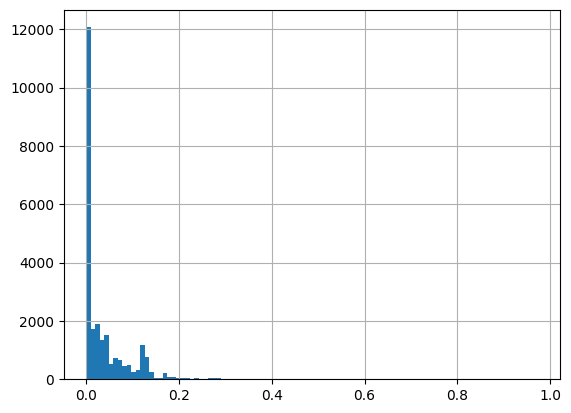

In [12]:
s_prob = pd.Series(probabilities)
s_prob.hist(bins=100)


count    25156.000000
mean         0.038869
std          0.061143
min          0.000000
25%          0.000000
50%          0.013988
75%          0.057896
max          0.971667
dtype: float64

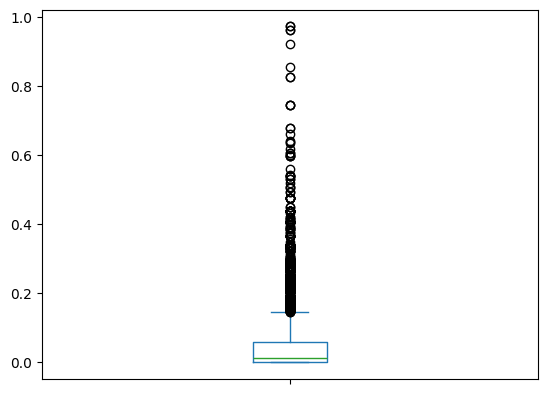

In [13]:
s_prob.plot.box()
s_prob.describe()

На графиках видно, что 75% полученных с помощью ML модели вероятностей лежат до 5.7%, медианное значение верояности - 1.3%, среднее - 3.9%

Вывод:
В рамках данной работы на основе алгоритма "случайный лес" была простоена ML модель, предсказывающая вероятность оформления заявки на кредит.
Полученная модель довольно точно предсказывает (96%) отсутствие заявки на кредит (класс 0), для класса 1 точность предсказания - 31%.
С помощью данной модели было получено распределение вероятностей получения заявки на оформление кредитного продкута, медианное значение верояности - 1.3%, среднее - 3.9%